<a href="https://colab.research.google.com/github/bidulki-99/ML-RL_for_selfstudy/blob/main/Chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

In [ ]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [ ]:
print(len(train_input[0]))

218


In [ ]:
print(len(train_input[1]))

189


In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [ ]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


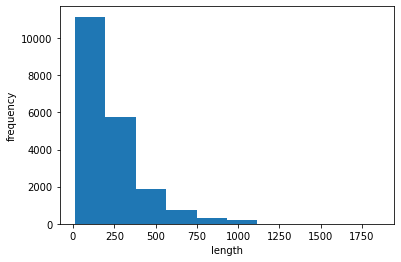

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

In [ ]:
print(train_seq.shape)

(20000, 100)


In [ ]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
val_seq = pad_sequences(val_input, maxlen = 100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64, validation_data = (val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 28s 80ms/step - loss: 0.6932 - accuracy: 0.5271 - val_loss: 0.6863 - val_accuracy: 0.5522
Epoch 2/100
313/313 [==============================] - 24s 76ms/step - loss: 0.6739 - accuracy: 0.5852 - val_loss: 0.6684 - val_accuracy: 0.6022
Epoch 3/100
313/313 [==============================] - 25s 79ms/step - loss: 0.6540 - accuracy: 0.6305 - val_loss: 0.6508 - val_accuracy: 0.6370
Epoch 4/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6331 - accuracy: 0.6707 - val_loss: 0.6317 - val_accuracy: 0.6680
Epoch 5/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6113 - accuracy: 0.6939 - val_loss: 0.6122 - val_accuracy: 0.6922
Epoch 6/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5912 - accuracy: 0.7174 - val_loss: 0.5936 - val_accuracy: 0.7120
Epoch 7/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5715 - accuracy: 0.7358 - val_loss: 0.5752 - val_ac

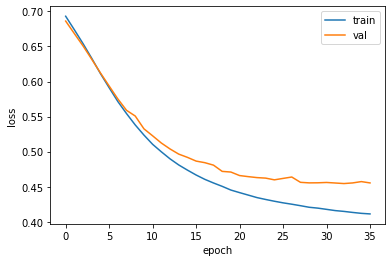

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 24ms/step - loss: 0.6734 - accuracy: 0.5786 - val_loss: 0.6412 - val_accuracy: 0.6466
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6172 - accuracy: 0.6906 - val_loss: 0.5985 - val_accuracy: 0.7172
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.5833 - accuracy: 0.7334 - val_loss: 0.5758 - val_accuracy: 0.7400
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.5586 - accuracy: 0.7549 - val_loss: 0.5554 - val_accuracy: 0.7466
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5390 - accuracy: 0.7674 - val_loss: 0.5419 - val_accuracy: 0.7584
Epoch 6/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5225 - accuracy: 0.7761 - val_loss: 0.5256 - val_accuracy: 0.7680
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5078 - accuracy: 0.7849 - val_loss: 0.5127 - val_accuracy:

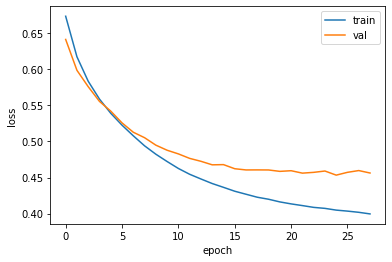

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 45ms/step - loss: 0.6923 - accuracy: 0.5533 - val_loss: 0.6913 - val_accuracy: 0.6024
Epoch 2/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6896 - accuracy: 0.6228 - val_loss: 0.6875 - val_accuracy: 0.6360
Epoch 3/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6807 - accuracy: 0.6350 - val_loss: 0.6716 - val_accuracy: 0.5962
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6449 - accuracy: 0.6885 - val_loss: 0.6247 - val_accuracy: 0.7326
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6069 - accuracy: 0.7376 - val_loss: 0.6012 - val_accuracy: 0.7312
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5864 - accuracy: 0.7411 - val_loss: 0.5842 - val_accuracy: 0.7372
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5691 - accuracy: 0.7492 - val_loss: 0.5683 - val_ac

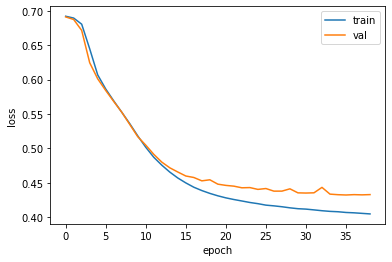

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model2.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 47ms/step - loss: 0.6923 - accuracy: 0.5354 - val_loss: 0.6913 - val_accuracy: 0.5960
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6896 - accuracy: 0.6004 - val_loss: 0.6873 - val_accuracy: 0.6418
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6814 - accuracy: 0.6454 - val_loss: 0.6731 - val_accuracy: 0.6550
Epoch 4/100
313/313 [==============================] - 15s 46ms/step - loss: 0.6364 - accuracy: 0.6735 - val_loss: 0.6041 - val_accuracy: 0.7204
Epoch 5/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5865 - accuracy: 0.7315 - val_loss: 0.5760 - val_accuracy: 0.7428
Epoch 6/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5616 - accuracy: 0.7490 - val_loss: 0.5546 - val_accuracy: 0.7582
Epoch 7/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5435 - accuracy: 0.7599 - val_loss: 0.5369 - val_ac

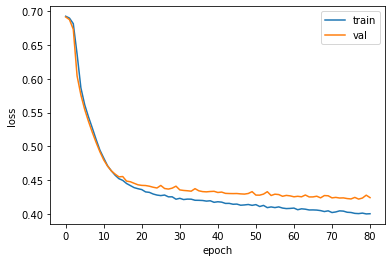

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model3.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 33s 91ms/step - loss: 0.6907 - accuracy: 0.5597 - val_loss: 0.6858 - val_accuracy: 0.6172
Epoch 2/100
313/313 [==============================] - 27s 86ms/step - loss: 0.6637 - accuracy: 0.6446 - val_loss: 0.6229 - val_accuracy: 0.6854
Epoch 3/100
313/313 [==============================] - 28s 88ms/step - loss: 0.5926 - accuracy: 0.7070 - val_loss: 0.5665 - val_accuracy: 0.7176
Epoch 4/100
313/313 [==============================] - 28s 88ms/step - loss: 0.5545 - accuracy: 0.7316 - val_loss: 0.5371 - val_accuracy: 0.7392
Epoch 5/100
313/313 [==============================] - 27s 87ms/step - loss: 0.5285 - accuracy: 0.7488 - val_loss: 0.5113 - val_accuracy: 0.7606
Epoch 6/100
313/313 [==============================] - 27s 86ms/step - loss: 0.5105 - accuracy: 0.7599 - val_loss: 0.5021 - val_accuracy: 0.7638
Epoch 7/100
313/313 [==============================] - 27s 87ms/step - loss: 0.4932 - accuracy: 0.7691 - val_loss: 0.4842 - val_ac

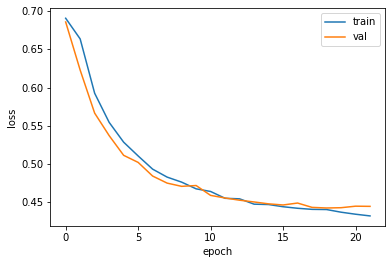

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model4.fit(train_seq, train_target, epochs = 100, batch_size = 64, validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 20s 56ms/step - loss: 0.6925 - accuracy: 0.5163 - val_loss: 0.6920 - val_accuracy: 0.5418
Epoch 2/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6908 - accuracy: 0.5549 - val_loss: 0.6901 - val_accuracy: 0.5550
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6880 - accuracy: 0.5745 - val_loss: 0.6869 - val_accuracy: 0.5664
Epoch 4/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6836 - accuracy: 0.5882 - val_loss: 0.6818 - val_accuracy: 0.5866
Epoch 5/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6769 - accuracy: 0.6067 - val_loss: 0.6744 - val_accuracy: 0.6064
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6669 - accuracy: 0.6237 - val_loss: 0.6639 - val_accuracy: 0.6184
Epoch 7/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6525 - accuracy: 0.6413 - val_loss: 0.6482 - val_ac

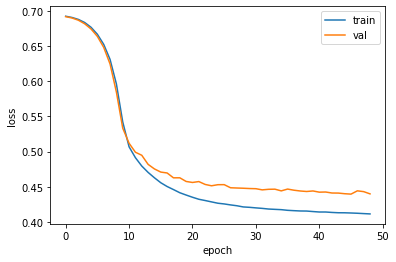

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
test_seq = pad_sequences(test_input, maxlen = 100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 15ms/step - loss: 0.4381 - accuracy: 0.7938
